## Air quality in Beijing Mar 2014 - Feb 2017

#### In this project I monitor and make forecasts for the sulfur dioxide and PM10 concentrations in the air in several locations in Beijing particularly NE, NW, W, C, S, and E Beijing.

### Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from datetime import datetime


In [3]:
# South Beijing
df=pd.read_csv('~jeffreyng/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [4]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [6]:
df1=pd.read_csv('~jeffreyng/PRSA_Data_Wanliu_20130301-20170228.csv')

In [7]:
df1

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [8]:
df2=pd.read_csv('~jeffreyng/PRSA_Data_Tiantan_20130301-20170228.csv')

In [9]:
df2

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [10]:
df3=pd.read_csv('~jeffreyng/PRSA_Data_Shunyi_20130301-20170228.csv')

In [11]:
df4=pd.read_csv('~jeffreyng/PRSA_Data_Nongzhanguan_20130301-20170228.csv')

In [12]:
df5=pd.read_csv('~jeffreyng/PRSA_Data_Huairou_20130301-20170228.csv')

In [13]:
df6=pd.read_csv('~jeffreyng/PRSA_Data_Gucheng_20130301-20170228.csv')

In [14]:
df7=pd.read_csv('~jeffreyng/PRSA_Data_Guanyuan_20130301-20170228.csv')

In [15]:
df8=pd.read_csv('~jeffreyng/PRSA_Data_Dongsi_20130301-20170228.csv')

In [16]:
df9=pd.read_csv('~jeffreyng/PRSA_Data_Dingling_20130301-20170228.csv')

In [17]:
df10=pd.read_csv('~jeffreyng/PRSA_Data_Changping_20130301-20170228.csv')

In [18]:
df11=pd.read_csv('~jeffreyng/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

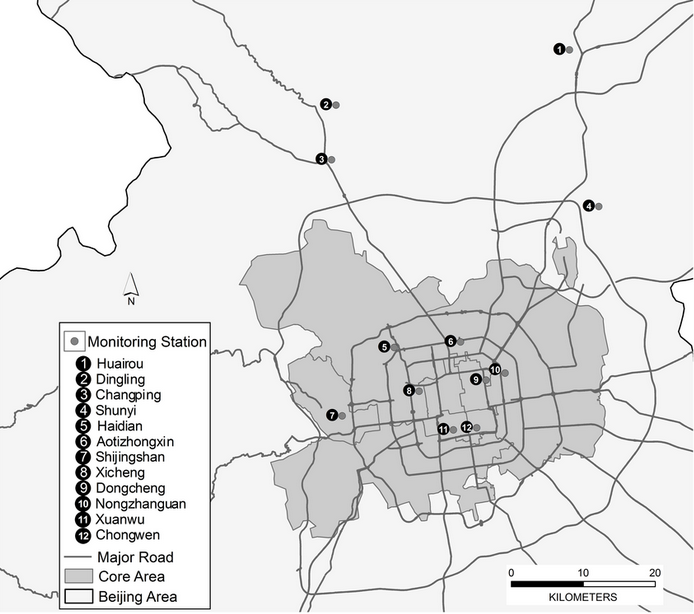

#### PM 10 = inhalable particles, with diameters that are generally 10 micrometers and smaller

#### PM 2.5 = Fine particulate matter is defined as particles that are 2.5 microns or less in diameter 


#### SO2 = Sulfur dioxide (particulate matter as a result of burning fossil fuels) causes shortness of breath, chest tightness, and overall lung health

#### NO2 = Nitrogen dioxide (burning of fossil fuels) similarly adverse effects on respiratory system

#### CO = Carbon monoxide

#### O3 = Ozone has adverse respiratory effects 

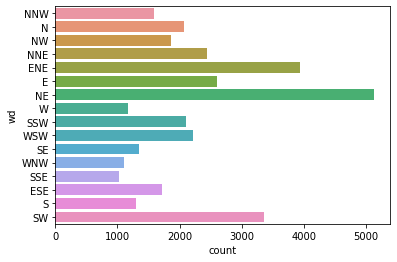

In [19]:
sns.countplot(y=df11.wd, orient= 'h')

### Data Preprocessing for Time Series

In [20]:
df4['datetime']= df4[df4.columns[1:5]].apply(lambda x: ','.join(x.dropna().astype(str)), 
                                                axis=1)

In [21]:
df4.datetime= [ele.replace(',', '-') for ele in df4.datetime]

In [22]:
df4.datetime = [datetime.strptime(ele, "%Y-%m-%d-%H") for ele in df4.datetime]
df4.set_index('datetime')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
2013-03-01 01:00:00,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2013-03-01 02:00:00,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
2013-03-01 03:00:00,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
2017-02-28 20:00:00,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
2017-02-28 21:00:00,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan


### In the air quality directive (2008/EC/50) the EU has set two limit values for sulphur dioxide (SO2) for the protection of human health: the SO2 hourly mean value may not exceed 350 micrograms per cubic metre (µg/m3) more than 24 times in a year and the SO2 daily mean value may not exceed 125 micrograms per cubic metre (µg/m3) more than 3 times in a year.

### Keeping your exposure to PM10 concentrations below 54.0 µg/m³ is the best way to prevent any short or long-term health effects from developing.

In [23]:
df['datetime'] = df[df.columns[1:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)


In [24]:
df.datetime= [ele.replace(',', '-') for ele in df.datetime]

In [25]:
df[df.PM10>54].PM10.value_counts()

72.0     189
64.0     188
80.0     186
58.0     185
101.0    184
        ... 
744.0      1
523.0      1
513.0      1
757.0      1
480.0      1
Name: PM10, Length: 593, dtype: int64

In [26]:
from datetime import datetime
df.datetime = [datetime.strptime(ele, "%Y-%m-%d-%H") for ele in df.datetime]
# >>> d
# datetime.datetime(2013, 4, 29, 15, 59, 2)
# >>> d.strftime("YYYYMMDD HH:mm:ss (%Y%m%d %H:%M:%S)")
# 'YYYYMMDD HH:mm:ss (20130429 15:59:02)'


In [27]:
df.set_index('datetime')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 01:00:00,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2013-03-01 02:00:00,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
2013-03-01 03:00:00,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
2013-03-01 04:00:00,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28 21:00:00,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


### Exploratory Data Analysis

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([734869., 735050., 735234., 735415., 735599., 735780., 735964.,
        736146., 736330.]), <a list of 9 Text xticklabel objects>)

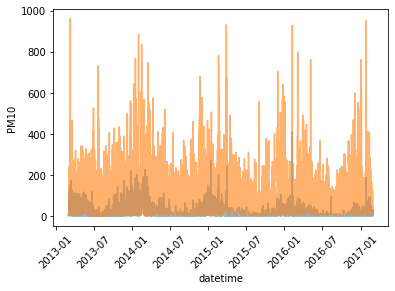

In [28]:
import matplotlib.pyplot as plt
plt.plot(figsize=(200, 1000))
sns.lineplot(x=df.datetime, y = df.SO2, alpha=.5)
sns.lineplot(x=df.datetime, y = df.PM10, alpha=.6)
plt.xticks(rotation = 45)

In [29]:
df5.SO2.value_counts()

2.0000      11723
3.0000       3558
4.0000       1814
5.0000       1449
6.0000       1286
            ...  
137.0000        1
129.0000        1
15.4224         1
12.5664         1
180.0000        1
Name: SO2, Length: 247, dtype: int64

In [30]:
df5['datetime'] = df5[df5.columns[1:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [31]:
df5.datetime= [ele.replace(',', '-') for ele in df5.datetime]

In [32]:
from datetime import datetime
df5.datetime = [datetime.strptime(ele, "%Y-%m-%d-%H") for ele in df5.datetime]

In [33]:
df5.set_index('datetime')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2013-03-01 02:00:00,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
2017-02-28 20:00:00,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
2017-02-28 21:00:00,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou


In [34]:
df5[df5.SO2>125]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
58,59,2013,3,3,10,77.0,97.0,133.0,74.0,1500.0,16.0,5.2,1011.7,-12.8,0.0,NW,0.9,Huairou,2013-03-03 10:00:00
136,137,2013,3,6,16,150.0,156.0,127.0,62.0,1399.0,70.0,13.6,1002.2,-6.1,0.0,E,0.7,Huairou,2013-03-06 16:00:00
154,155,2013,3,7,10,144.0,171.0,126.0,78.0,1200.0,65.0,11.1,1002.4,-3.8,0.0,WSW,1.3,Huairou,2013-03-07 10:00:00
155,156,2013,3,7,11,116.0,138.0,128.0,87.0,1399.0,65.0,13.7,1000.8,-3.6,0.0,S,1.4,Huairou,2013-03-07 11:00:00
156,157,2013,3,7,12,122.0,169.0,144.0,113.0,1800.0,65.0,15.9,998.5,-5.2,0.0,ESE,1.9,Huairou,2013-03-07 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,8707,2014,2,26,18,468.0,493.0,158.0,148.0,5500.0,14.0,5.7,1013.7,4.5,0.4,SE,0.6,Huairou,2014-02-26 18:00:00
8796,8797,2014,3,2,12,155.0,177.0,131.0,79.0,2500.0,52.0,7.4,1012.6,-5.7,0.0,SSE,1.5,Huairou,2014-03-02 12:00:00
17281,17282,2015,2,19,1,659.0,991.0,314.0,52.0,2400.0,2.0,-1.0,1024.0,-10.1,0.0,ENE,0.9,Huairou,2015-02-19 01:00:00
17282,17283,2015,2,19,2,762.0,NaN,181.0,46.0,2400.0,2.0,-2.0,1019.0,-10.8,0.0,NW,0.9,Huairou,2015-02-19 02:00:00


(array([734869., 735050., 735234., 735415., 735599., 735780., 735964.,
        736146., 736330.]), <a list of 9 Text xticklabel objects>)

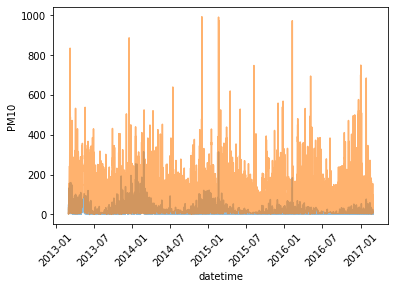

In [36]:
fig = plt.figure()
plt.plot(figsize=(200, 1000))
so2=sns.lineplot(x=df5.datetime, y = df5.SO2, alpha=.5)
pm10=sns.lineplot(x=df5.datetime, y = df5.PM10, alpha=.6)

plt.xticks(rotation = 45)

#### Data shows that air pollution is seasonal, worst during the winter tapering off by summer and increasing again approaching winter. Data also suggests that PM10 conc. were unsafe for a total of 593 hours or about 24 total days in 4 years.

#### For sulfur dioxide there were 111 hours where concentration levels would cause health effects which is more than the allowable safety protocol of 3 days per year with unsafe concentrations.

In [41]:
df9

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [42]:
df9['datetime'] = df9[df9.columns[1:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [43]:
df11['datetime'] = df11[df11.columns[1:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [44]:
df9.datetime= [ele.replace(',', '-') for ele in df9.datetime]

In [45]:
df11.datetime= [ele.replace(',', '-') for ele in df11.datetime]

In [46]:
from datetime import datetime
df9.datetime = [datetime.strptime(ele, "%Y-%m-%d-%H") for ele in df9.datetime]
df9.set_index('datetime')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


In [47]:
df11.datetime = [datetime.strptime(ele, "%Y-%m-%d-%H") for ele in df11.datetime]
df11.set_index('datetime')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
2017-02-28 21:00:00,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin


(array([734869., 735050., 735234., 735415., 735599., 735780., 735964.,
        736146., 736330.]), <a list of 9 Text xticklabel objects>)

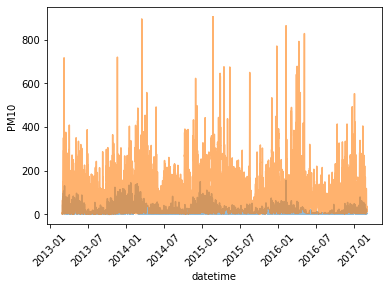

In [48]:
plt.plot(figsize=(200, 1000))
sns.lineplot(x=df9.datetime, y = df9.SO2, alpha=.5)
sns.lineplot(x=df9.datetime, y = df9.PM10, alpha=.6)
plt.xticks(rotation = 45)

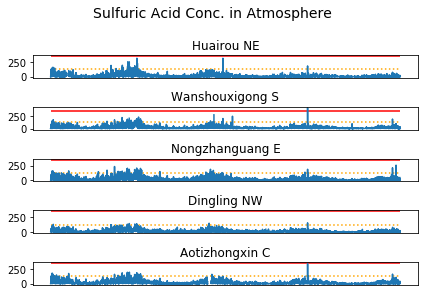

In [49]:
fig, axs = plt.subplots(5)
fig.suptitle('Sulfuric Acid Conc. in Atmosphere', fontsize=14, va= 'baseline')


axs[0].plot(df5.datetime, df5.SO2)
axs[1].plot(df.datetime, df.SO2)
axs[2].plot(df4.datetime, df4.SO2)
axs[3].plot(df9.datetime, df9.SO2)
axs[4].plot(df11.datetime, df11.SO2)
axs[0].title.set_text('Huairou NE')
axs[1].title.set_text('Wanshouxigong S')
axs[2].title.set_text('Nongzhanguang E')
axs[3].title.set_text('Dingling NW')
axs[4].title.set_text('Aotizhongxin C')
for axs in axs:
    axs.set_xticks([])
    axs.hlines(y=125, xmin='2013-03-01', xmax='2017-02-28', color='orange', label='mean/day', linestyles='dotted')
    axs.hlines(y=350, xmin='2013-03-01', xmax='2017-02-28', color='red', label='hour/day')
plt.xticks(rotation = 45)
plt.tight_layout()
fig.subplots_adjust(top=.85)
plt.show()

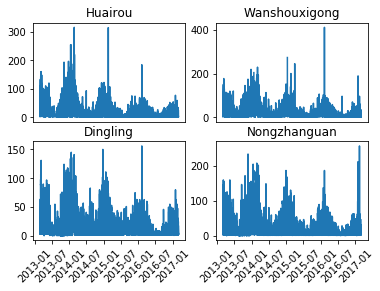

In [50]:
fig = plt.figure()
plt.title('SO2 conc in Atmos')
plt.subplot(2, 2, 1)
plt.plot(df5.datetime, df5.SO2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Huairou')
plt.subplot(2, 2, 2)
plt.plot(df.datetime, df.SO2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.title('Wanshouxigong')
plt.subplot(2, 2, 3)
plt.plot(df9.datetime, df9.SO2)
plt.xticks(rotation = 45)
plt.title('Dingling')
plt.subplot(2, 2, 4)
plt.plot(df4.datetime, df4.SO2)
plt.xticks(rotation = 45)
plt.title('Nongzhanguan')

plt.show()

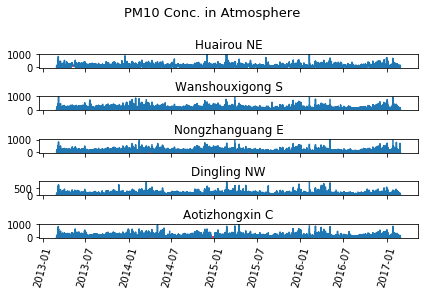

In [98]:
fig, axs = plt.subplots(5, sharex=True)
fig.suptitle('PM10 Conc. in Atmosphere', fontsize=13, va= 'baseline')


axs[0].plot(df5.datetime, df5.PM10)
axs[1].plot(df.datetime, df.PM10)
axs[2].plot(df4.datetime, df4.PM10)
axs[3].plot(df9.datetime, df9.PM10)
axs[4].plot(df11.datetime, df11.PM10)

axs[0].title.set_text('Huairou NE')
axs[1].title.set_text('Wanshouxigong S')
axs[2].title.set_text('Nongzhanguang E')
axs[3].title.set_text('Dingling NW')
axs[4].title.set_text('Aotizhongxin C')
for axs in axs:
#     axs.set_xticks([])
    axs.hlines(y=54, xmin='2013-03-01', xmax='2017-02-28', color='red', 
               label='mean/day', linestyles='solid')

plt.xticks(rotation = 75)
plt.tight_layout()
fig.subplots_adjust(top=.85)
plt.show()

#### From our chart on PM10, there seems to be no seasonality or trends in PM10 concentrations. It seems however, that PM10 saturates the entire city and is present in equal amounts in all five stations. 